In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_csv('./data/clean.csv')

In [3]:
df.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price,ambrane,boat,...,Leather,Metal,Nylon,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727,-13200.000001,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091,-5991.000000,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000,-18200.000000,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091,-3400.000000,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091,-2500.000000,0,0,...,0,0,0,1,0,0,0,0,0,0


In [7]:
df.shape

(181, 201)

In [4]:
X = df.drop('Discount Price', axis=1)
y = df['Discount Price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

res = r2_score(y_test, y_pred)
print(res)


-579.0948911403524


In [8]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)



0.7241505834079535


In [9]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)


0.5669233748920277


In [10]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)


0.696532965457126


In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(dt_model, X, y, cv=5, scoring='r2')

print('cross_val_score: ', score, score.mean(), score.std())

0.793658658358447
cross_val_score:  [ 0.53816302  0.55214844 -0.06156576 -0.36873833 -0.50212686] 0.03157610250174794 0.443033129422879


In [13]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

print('cross_val_score: ', score, score.mean(), score.std())

0.5638104220448954
cross_val_score:  [0.46488116 0.78689425 0.45704781 0.60780122 0.77168898] 0.617662686409958 0.1425482401263625


In [14]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(model, X, y, cv=5, scoring='r2')

print('cross_val_score: ', score, score.mean(), score.std())

0.696532965457126
cross_val_score:  [0.71302709 0.65764933 0.61387495 0.55157082 0.72571505] 0.6523674467646415 0.06438787822440571


In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_gird = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_gird, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = xgb.XGBRegressor(**best_params)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)



0.8154684874634421


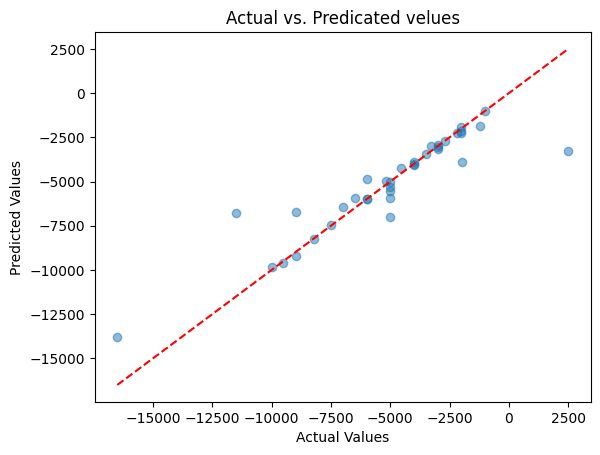

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test, y_pred, alpha=0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicated velues')
plt.show()

In [18]:
import pickle 

with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [19]:
with open('model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

In [20]:
y_pred = xgb_model.predict(X_test)

print(r2_score(y_test, y_pred))


0.8154684874634421
